In [1]:
from datasets import load_dataset
from collections import defaultdict

# Load dataset
ds = load_dataset("taidng/UIT-ViQuAD2.0")
train = ds["train"] 

topic_counts = defaultdict(int)

for item in train:
    topic = item["title"]              # tên chủ đề
    topic_counts[topic] += 1           # mỗi item = 1 câu hỏi

# In kết quả
print("Tổng số chủ đề:", len(topic_counts))
print("\nDanh sách chủ đề và số lượng câu hỏi:\n")

for topic, count in topic_counts.items():
    print(f"- {topic}: {count} câu hỏi")


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/5.20M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/735k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28454 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3814 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7301 [00:00<?, ? examples/s]

Tổng số chủ đề: 138

Danh sách chủ đề và số lượng câu hỏi:

- Phạm Văn Đồng: 41 câu hỏi
- Thực vật có hoa: 138 câu hỏi
- Phần mềm giáo dục: 63 câu hỏi
- Ngôn ngữ máy: 42 câu hỏi
- Edward I của Anh: 415 câu hỏi
- Nhật Bản: 290 câu hỏi
- Đồng hồ cát: 43 câu hỏi
- Albert Einstein: 366 câu hỏi
- Voyager 1: 49 câu hỏi
- Cộng hòa Dân chủ Đức: 196 câu hỏi
- Karl Marx: 374 câu hỏi
- Lưu vực: 46 câu hỏi
- Đế quốc Ottoman: 186 câu hỏi
- Thư viện Quốc gia Pháp: 164 câu hỏi
- Nhôm: 51 câu hỏi
- Dương cầm: 47 câu hỏi
- Người Ê Đê: 109 câu hỏi
- Thổ Nhĩ Kỳ: 311 câu hỏi
- Động vật lưỡng cư: 111 câu hỏi
- Dòng Tên: 43 câu hỏi
- Lịch sử thế giới: 393 câu hỏi
- Roma: 522 câu hỏi
- Pyrit: 60 câu hỏi
- Quảng Châu: 162 câu hỏi
- Dân chủ trực tiếp: 53 câu hỏi
- Ngành (sinh học): 41 câu hỏi
- Thành phố Hồ Chí Minh: 334 câu hỏi
- Thực vật: 83 câu hỏi
- Terbi: 60 câu hỏi
- Giấy phép Tài liệu Tự do GNU: 47 câu hỏi
- Công nghệ thông tin và truyền thông: 32 câu hỏi
- Hà Nam (Trung Quốc): 335 câu hỏi
- Nhà Hán: 30

In [4]:
geo_topics = [
    "Nhật Bản",
    "Cộng hòa Dân chủ Đức",
    "Thổ Nhĩ Kỳ",
    "Châu Mỹ",
    "Châu Nam Cực",
    "Ả Rập Xê Út",
    "Ukraina",
    "Bồ Đào Nha",
    "Cuba",
    "Iran",
    "Pháp",
    "Trung Quốc",
    "Bắc Phi",
    "Quảng Châu",
    "Thành phố Hồ Chí Minh",
    "Khánh Hòa",
    "Birmingham",
    "Hà Nam (Trung Quốc)",
    "Hà Nam",
    "Bạc Liêu",
    "Bình Định",
    "Điện Biên",
    "Hà Nội",
    "Đồng Tháp",
    "Biển Đông",
    "Nam Đại Dương",
    "Đảo Ireland",
    "Đế quốc La Mã",
    "Roma",
    "Vườn quốc gia Phong Nha - Kẻ Bàng",
    "Nam Bộ (Việt Nam)",

]

In [5]:
from datasets import load_dataset

# 1) Load dataset
ds = load_dataset("taidng/UIT-ViQuAD2.0")
train = ds["train"]

# 2) Lọc theo chủ đề địa lý
geo_train = train.filter(lambda x: x["title"] in geo_topics)

# 3) Loại bỏ unanswerable
geo_train = geo_train.filter(lambda x: len(x["answers"]["text"]) > 0)

# 4) Shuffle để phân phối đều
geo_train = geo_train.shuffle(seed=42)

print("Sau khi lọc answerable:", len(geo_train))

# 5) Tách ra test ~1000 mẫu
split1 = geo_train.train_test_split(test_size=1000, seed=42)
train_part = split1["train"]
test_geo = split1["test"]

# 6) Tách val ~500 mẫu
split2 = train_part.train_test_split(test_size=500, seed=42)
train_geo = split2["train"]
val_geo = split2["test"]

print("Train:", len(train_geo))
print("Val:", len(val_geo))
print("Test:", len(test_geo))


Filter:   0%|          | 0/28454 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8994 [00:00<?, ? examples/s]

Sau khi lọc answerable: 6006
Train: 4506
Val: 500
Test: 1000


Tổng số chủ đề: 31
Sau khi lọc answerable: 6006


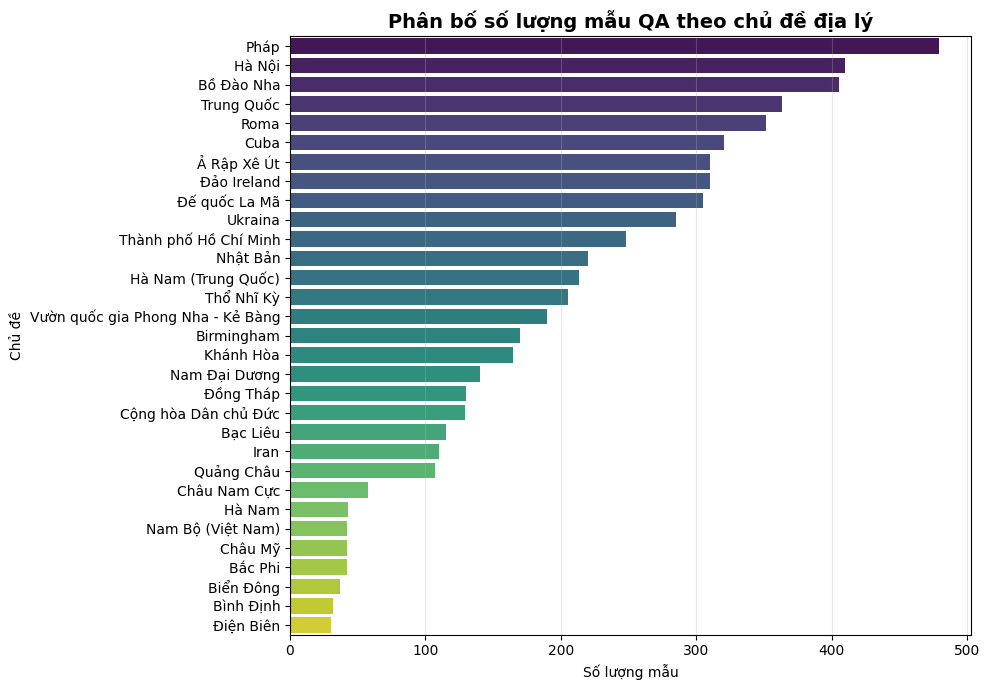

In [6]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# =============================
# 2️Load & lọc dataset
# =============================
ds = load_dataset("taidng/UIT-ViQuAD2.0")
train = ds["train"]

geo_train = train.filter(lambda x: x["title"] in geo_topics)
geo_train = geo_train.filter(lambda x: len(x["answers"]["text"]) > 0)

print("Tổng số chủ đề:", len(geo_topics))
print("Sau khi lọc answerable:", len(geo_train))

# =============================
# 3️Đếm số mẫu theo chủ đề
# =============================
df = pd.DataFrame(geo_train)
topic_counts = df["title"].value_counts().reset_index()
topic_counts.columns = ["Chủ đề", "Số mẫu"]

# =============================
# 4️Vẽ biểu đồ thanh
# =============================
plt.figure(figsize=(10,7))
sns.barplot(y="Chủ đề", x="Số mẫu", data=topic_counts, palette="viridis")
plt.title("Phân bố số lượng mẫu QA theo chủ đề địa lý", fontsize=14, fontweight='bold')
plt.xlabel("Số lượng mẫu")
plt.ylabel("Chủ đề")
plt.grid(alpha=0.3, axis="x")
plt.tight_layout()
plt.show()


In [15]:
for i in range(3):
    sample = test_geo[i]
    print(f"\n===== TEST SAMPLE {i+1} =====")
    print("Title:", sample["title"])
    print("Question:", sample["question"])
    print("Answer:", sample["answers"]["text"])
    print("Context:", sample["context"][:300], "...")



===== TEST SAMPLE 1 =====
Title: Pháp
Question: Rapsodie espagnole do ai sáng tác?
Answer: ['Ravel']
Context: Érik Satie là một thành viên chủ chốt của phái tiên phong Paris đầu thế kỷ XX, nổi tiếng với Gymnopédies. Các tác phẩm được biết đến nhiều nhất của Francis Poulenc là tổ khúc piano Trois mouvements perpétuels (1919), ba lê Les biches (1923), Concert champêtre (1928) cho đàn clavecin và dàn nhạc, ope ...

===== TEST SAMPLE 2 =====
Title: Pháp
Question: Những nước nào viện trợ phát triển nhiều hơn Pháp năm 2013?
Answer: ['Mỹ, Anh và Đức']
Context: Năm 2013, Pháp là nhà tài trợ viện trợ phát triển lớn thứ tư trên thế giới, sau Mỹ, Anh và Đức. Con số này chiếm 0,36% của Pháp, và theo tỷ lệ GDP thì Pháp là nhà tài trợ lớn thứ 12 trong danh sách. Cơ quan Phát triển Pháp là tổ chức quản lý giúp đỡ của Pháp, nguồn vốn chủ yếu tập trung vào các dự á ...

===== TEST SAMPLE 3 =====
Title: Trung Quốc
Question: Ai là Tổng bí thư của Đảng Cộng sản Trung Quốc từ tháng 11 năm 2012?
Answer: ['

In [16]:
import random

for i in random.sample(range(len(train_geo)), 5):
    sample = train_geo[i]
    print("\n===== RANDOM SAMPLE =====")
    print("Title:", sample["title"])
    print("Question:", sample["question"])
    print("Answer:", sample["answers"]["text"])
    print("Context:", sample["context"][:300], "...")



===== RANDOM SAMPLE =====
Title: Vườn quốc gia Phong Nha - Kẻ Bàng
Question: Tổ chức động thực vật đã gửi thư cho UNESCO vào ngày tháng năm nào?
Answer: ['ngày 15 tháng 12 năm 2000']
Context: Trong một bức thư của Tổ chức động thực vật gửi UNESCO ngày 15 tháng 12 năm 2000 ước tính cần 4,5 tấn thuốc nổ cho mỗi km đường. Do đó việc xem xét đánh giá để công nhận là di sản thế giới đối với vườn quốc gia này không tiến triển gì hơn. Tháng 5 năm 2002, Chính phủ Việt Nam cung cấp thêm thông tin ...

===== RANDOM SAMPLE =====
Title: Đế quốc La Mã
Question: Theo luật La Mã, thân phận của nô lệ được xác định như thế nào?
Answer: ['nô lệ được coi là tài sản và không có địa vị pháp lý']
Context: Pháp luật liên quan đến chế độ nô lệ là "cực kỳ phức tạp". Theo luật La Mã, nô lệ được coi là tài sản và không có địa vị pháp lý. Họ có thể phải chịu các hình thức nhục hình vốn không thường được áp dụng đối với công dân, bóc lột tình dục, tra tấn, và hành quyết nô lệ mà không cần xét xử. Một nô lệ  ...



In [1]:
!pip install -q trl transformers accelerate datasets sentencepiece

In [25]:
def preprocess_for_chat(example):
    question = example["question"]
    answer = example["answers"]["text"][0]
    context = example["context"]

    user_prompt = (
        "Trả lời câu hỏi dựa trên đoạn văn sau.\n\n"
        f"Đoạn văn:\n{context}\n\n"
        f"Câu hỏi: {question}"
    )

    return {
        "messages": [
            {"role": "user", "content": user_prompt},
            {"role": "assistant", "content": answer}
        ]
    }

In [22]:
train_ds = train_geo.map(preprocess_for_chat, remove_columns=train_geo.features)
val_ds   = val_geo.map(preprocess_for_chat,   remove_columns=val_geo.features)

print(train_ds[0]["messages"])


Map:   0%|          | 0/4506 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

[{'content': 'Trả lời câu hỏi dựa trên đoạn văn sau.\n\nĐoạn văn:\nCác món đặc sản của Khánh hòa được nhiều người biết đến như nem Ninh Hòa, bún cá Nha Trang, bún sứa, bánh ướt Diên Khánh... Ngoài ra dưới sự ảnh hưởng của người Hoa (s. sống đông đúc gần khu vực chợ Đầm phường Xương Huân), người Pháp (từng đến Nha Trang nghỉ dưỡng rất đông thời Pháp thuộc) và những người miền Bắc di cư vào Nam sau năm 1954 tạo cho Nha Trang phong cách ẩm thực đặc biệt khác hẳn với các địa phương khác trong tỉnh và khu vực Nam Trung Bộ tiêu biểu là những món ăn như phở Nha Trang, bánh mì Nha Trang, bò nướng Lạc Cảnh...\n\nCâu hỏi: Những món ăn đặc sản nổi tiếng tại Khánh Hòa là gì?', 'role': 'user'}, {'content': 'nem Ninh Hòa, bún cá Nha Trang, bún sứa, bánh ướt Diên Khánh..', 'role': 'assistant'}]


In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "Qwen/Qwen3-0.6B"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

tokenizer.padding_side = "right"


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!
2025-11-22 12:17:07.523806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763813827.716522      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763813827.768035      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [14]:
from trl import SFTConfig

args = SFTConfig(
    output_dir="./qwen_geo_qa",          # Thư mục lưu mô hình sau huấn luyện
    num_train_epochs=1,                  # Huấn luyện 1 epoch
    per_device_train_batch_size=2,       # Batch size = 2
    gradient_accumulation_steps=2,       # Tích lũy gradient để mô phỏng batch lớn hơn
    learning_rate=2e-4,                  # Tốc độ học
    warmup_ratio=0.03,                   # Tỷ lệ khởi động warmup
    logging_steps=10,                    # Ghi log sau mỗi 10 bước
    save_strategy="epoch",               # Lưu model sau mỗi epoch
    optim="adamw_torch_fused",           # Tối ưu bằng AdamW
    max_length=1024,                     # Độ dài tối đa mỗi chuỗi
    report_to="none"                     # Không ghi log lên WandB hay TensorBoard
)


In [15]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    processing_class=tokenizer,
)


/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

Tokenizing train dataset:   0%|          | 0/4506 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/4506 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

In [16]:
trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


Step,Training Loss
10,2.660600
20,2.362000
30,2.528500
40,2.746300
50,2.712900
60,2.812000
70,2.713800
80,2.787900
90,2.723900
100,2.713100


TrainOutput(global_step=1127, training_loss=1.55896115366505, metrics={'train_runtime': 3849.7828, 'train_samples_per_second': 1.17, 'train_steps_per_second': 0.293, 'total_flos': 4255629182238720.0, 'train_loss': 1.55896115366505, 'entropy': 0.6553585873200343, 'num_tokens': 1400894.0, 'mean_token_accuracy': 0.8532668260427622, 'epoch': 1.0})

Chạy xong 1 tiếng là chạy mấy cái dưới để lưu model và test nhớ nén zip tải về máy để load lại so với cái kia

In [17]:
trainer.save_model()
tokenizer.save_pretrained(args.output_dir)


('./qwen_geo_qa/tokenizer_config.json',
 './qwen_geo_qa/special_tokens_map.json',
 './qwen_geo_qa/chat_template.jinja',
 './qwen_geo_qa/vocab.json',
 './qwen_geo_qa/merges.txt',
 './qwen_geo_qa/added_tokens.json',
 './qwen_geo_qa/tokenizer.json')

test trên tập test 1000 kiếm 1 chỉ số phù hợp

In [15]:
def clean_answer(text):
    # Xoá reasoning block <think>...</think>
    if "<think>" in text and "</think>" in text:
        text = text.split("</think>")[-1]   # lấy phần sau </think>

    # Xoá tag còn sót lại
    text = text.replace("<think>", "")
    text = text.replace("</think>", "")
    text = text.replace("<|im_end|>", "")

    # Xoá xuống dòng thừa
    return text.strip()


def build_prompt(context, question):
    return (
        "Trả lời câu hỏi dựa trên đoạn văn sau.\n\n"
        f"Đoạn văn:\n{context}\n\n"
        f"Câu hỏi: {question}\n\n"
        "Trả lời:"
    )


def model_answer(model, tokenizer, context, question):

    messages = [
        {"role": "user", "content": build_prompt(context, question)}
    ]

    # 1) build prompt
    prompt_text = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        tokenize=False,
    )

    # 2) tokenize
    inputs = tokenizer(prompt_text, return_tensors="pt").to(model.device)

    # 3) generate
    outputs = model.generate(
        **inputs,
        max_new_tokens=64,
        do_sample=False
    )

    # 4) decode phần answer
    raw = tokenizer.decode(
        outputs[0][inputs["input_ids"].shape[-1]:]
    )

    # 5) clean <think> <|im_end|> ...
    return clean_answer(raw)




print("=== TEST ===")
for i in range(3):
    s = test_geo[i]
    print("Q:", s["question"])
    print("G:", s["answers"]["text"][0])
    print("P:", model_answer(model, tokenizer, s["context"], s["question"]))
    print()


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


=== TEST ===
Q: Rapsodie espagnole do ai sáng tác?
G: Ravel
P: Rapsodie espagnole

Q: Những nước nào viện trợ phát triển nhiều hơn Pháp năm 2013?
G: Mỹ, Anh và Đức
P: Mỹ, Anh và Đức

Q: Ai là Tổng bí thư của Đảng Cộng sản Trung Quốc từ tháng 11 năm 2012?
G: Tập Cận Bình
P: Tập Cận Bình



Them du lieu



In [4]:
from datasets import load_dataset

# 1) Load dataset
ds = load_dataset("taidng/UIT-ViQuAD2.0")
train = ds["train"]

# 2) Lọc theo chủ đề địa lý
geo_train = train.filter(lambda x: x["title"] in geo_topics)

# 3) Loại bỏ unanswerable
geo_train = geo_train.filter(lambda x: len(x["answers"]["text"]) > 0)

# 4) Shuffle để phân phối đều
geo_train = geo_train.shuffle(seed=42)

print("Sau khi lọc answerable:", len(geo_train))

# 5) Tách ra test ~1000 mẫu
split1 = geo_train.train_test_split(test_size=1000, seed=42)
train_part = split1["train"]
test_geo = split1["test"]

# 6) Tách val ~500 mẫu
split2 = train_part.train_test_split(test_size=500, seed=42)
train_geo = split2["train"]
val_geo = split2["test"]

print("Train:", len(train_geo))
print("Val:", len(val_geo))
print("Test:", len(test_geo))


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/5.20M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/735k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28454 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3814 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7301 [00:00<?, ? examples/s]

Filter:   0%|          | 0/28454 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8994 [00:00<?, ? examples/s]

Sau khi lọc answerable: 6006
Train: 4506
Val: 500
Test: 1000


In [10]:
def preprocess_for_chat(example):
    question = example["question"]
    answer = example["answers"]["text"][0]
    context = example["context"]

    user_prompt = (
        "Trả lời câu hỏi dựa trên đoạn văn sau.\n\n"
        f"Đoạn văn:\n{context}\n\n"
        f"Câu hỏi: {question}"
    )

    return {
        "messages": [
            {"role": "user", "content": user_prompt},
            {"role": "assistant", "content": answer}
        ]
    }

In [11]:
train_ds = train_geo.map(preprocess_for_chat, remove_columns=train_geo.features)
val_ds   = val_geo.map(preprocess_for_chat,   remove_columns=val_geo.features)

print(train_ds[0]["messages"])


Map:   0%|          | 0/4506 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

[{'content': 'Trả lời câu hỏi dựa trên đoạn văn sau.\n\nĐoạn văn:\nCác món đặc sản của Khánh hòa được nhiều người biết đến như nem Ninh Hòa, bún cá Nha Trang, bún sứa, bánh ướt Diên Khánh... Ngoài ra dưới sự ảnh hưởng của người Hoa (s. sống đông đúc gần khu vực chợ Đầm phường Xương Huân), người Pháp (từng đến Nha Trang nghỉ dưỡng rất đông thời Pháp thuộc) và những người miền Bắc di cư vào Nam sau năm 1954 tạo cho Nha Trang phong cách ẩm thực đặc biệt khác hẳn với các địa phương khác trong tỉnh và khu vực Nam Trung Bộ tiêu biểu là những món ăn như phở Nha Trang, bánh mì Nha Trang, bò nướng Lạc Cảnh...\n\nCâu hỏi: Những món ăn đặc sản nổi tiếng tại Khánh Hòa là gì?', 'role': 'user'}, {'content': 'nem Ninh Hòa, bún cá Nha Trang, bún sứa, bánh ướt Diên Khánh..', 'role': 'assistant'}]


Gop va luu file(1)

In [10]:
!pip install bitsandbytes accelerate transformers trl --upgrade


Sinh thêm synthetic data bằng Qwen 2-7B

In [9]:
from datasets import load_dataset, concatenate_datasets
from transformers import AutoTokenizer, AutoModelForCausalLM
from trl import SFTTrainer, SFTConfig
import torch, shutil

# ===============================
# Load mô hình Qwen-2-7B-Instruct
# ===============================
model_id = "Qwen/Qwen2-7B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)


2025-11-30 07:15:20.862240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764486921.051688      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764486921.104180      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

In [24]:
import json, re

# ============================================================
# Sinh mẫu QA chuẩn ViQuAD + kiểm tra định dạng + lưu file
# ============================================================

def chat_qwen(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    out = model.generate(
        **inputs,
        max_new_tokens=250,
        temperature=0.0,
        do_sample=False
    )
    return tokenizer.decode(out[0], skip_special_tokens=True).replace(prompt, "").strip()


def extract_balanced_json(text):
    """Trích JSON hợp lệ bằng cách đếm ngoặc nhọn (chống lỗi xuống dòng, ngoặc unicode)."""
    text = text.replace("“", '"').replace("”", '"').replace("’", "'")
    start = text.find("{")
    if start == -1:
        return None
    depth = 0
    for i in range(start, len(text)):
        if text[i] == "{":
            depth += 1
        elif text[i] == "}":
            depth -= 1
            if depth == 0:
                candidate = text[start:i+1]
                try:
                    return json.loads(candidate)
                except Exception:
                    fixed = candidate.replace("\n", " ").replace("\r", "")
                    try:
                        return json.loads(fixed)
                    except:
                        return None
    return None


def is_valid_viquad_format(js):
    """Kiểm tra JSON có đúng cấu trúc ViQuAD 2.0 không"""
    if not isinstance(js, dict):
        return False
    required_keys = {"context", "question", "answers"}
    if not required_keys.issubset(js.keys()):
        return False
    answers = js.get("answers")
    if not isinstance(answers, dict) or "text" not in answers:
        return False
    if not isinstance(answers["text"], list):
        return False
    if not all(isinstance(t, str) for t in answers["text"]):
        return False
    return True


# ==========================
# Prompts
# ==========================
CONTEXT_PROMPT = """Viết 2–3 câu về chủ đề "{topic}".
Không giải thích, không ví dụ, không mở đầu hay kết luận.
Chỉ in đoạn văn."""

QA_PROMPT = """Dựa trên đoạn văn sau:

{context}

Tạo đúng 1 cặp Question–Answer dựa hoàn toàn vào đoạn văn trên.
Chỉ in **1 JSON hợp lệ**, không ví dụ, không giải thích, không ký tự nào khác.

Cấu trúc bắt buộc:
{{
  "context": "{context}",
  "question": "...",
  "answers": {{"text": ["..."]}}
}}
"""


# ==========================
# Run thử 1 chủ đề
# ==========================
topic = "Nhật Bản"
output_file = "geo_sample_qwen.jsonl"

print("=== 1️⃣ Sinh context ===")
context = chat_qwen(CONTEXT_PROMPT.format(topic=topic))
print(context)

print("\n=== 2️⃣ Sinh Q/A ===")
qa_prompt = QA_PROMPT.format(context=context)
qa_raw = chat_qwen(qa_prompt)
print(qa_raw)

# ==========================
# Parse JSON
# ==========================
print("\n=== 3️⃣ JSON TRÍCH ĐƯỢC ===")
qa_json = extract_balanced_json(qa_raw)
if qa_json:
    print(json.dumps(qa_json, ensure_ascii=False, indent=2))
else:
    print("❌ Không trích được JSON hợp lệ")

# ==========================
# Kiểm tra format + Lưu file
# ==========================
print("\n=== 4️⃣ KIỂM TRA FORMAT & LƯU FILE ===")
if qa_json and is_valid_viquad_format(qa_json):
    with open(output_file, "a", encoding="utf-8") as f:
        f.write(json.dumps(qa_json, ensure_ascii=False) + "\n")
    print(f"✅ JSON hợp lệ — đã lưu vào file: {output_file}")
else:
    print("❌ JSON không đúng format, KHÔNG lưu file.")


=== 1️⃣ Sinh context ===
Nhật Bản là một quốc gia nằm ở phía đông bán đảo Nhật Bản, được bao quanh bởi Thái Bình Dương và Biển Nhật Bản. Đây là một quốc gia có lịch sử lâu đời với nhiều di sản văn hóa độc đáo và phong cảnh tự nhiên tuyệt đẹp. Nhật Bản nổi tiếng với công nghệ tiên tiến, chế độ sống hiện đại và nền ẩm thực đa dạng, đặc biệt là sushi và ramen.

=== 2️⃣ Sinh Q/A ===
{
  "context": "Nhật Bản là một quốc gia nằm ở phía đông bán đảo Nhật Bản, được bao quanh bởi Thái Bình Dương và Biển Nhật Bản. Đây là một quốc gia có lịch sử lâu đời với nhiều di sản văn hóa độc đáo và phong cảnh tự nhiên tuyệt đẹp. Nhật Bản nổi tiếng với công nghệ tiên tiến, chế độ sống hiện đại và nền ẩm thực đa dạng, đặc biệt là sushi và ramen.",
  "question": "Nhật Bản nằm ở vị trí nào trên bản đồ?",
  "answers": {"text": ["ở phía đông bán đảo Nhật Bản"]}
}

=== 3️⃣ JSON TRÍCH ĐƯỢC ===
{
  "context": "Nhật Bản là một quốc gia nằm ở phía đông bán đảo Nhật Bản, được bao quanh bởi Thái Bình Dương và Biển Nhật

In [29]:
import json, re, random, time
from tqdm import tqdm

# ============================================================
# SINH DỮ LIỆU QA VIQUAD 
# ============================================================

def chat_qwen(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    out = model.generate(
        **inputs,
        max_new_tokens=250,
        temperature=0.3,
        do_sample=True,
        top_p=0.9
    )
    return tokenizer.decode(out[0], skip_special_tokens=True).replace(prompt, "").strip()

def extract_balanced_json(text):
    """Trích khối JSON hợp lệ bằng cách đếm ngoặc nhọn."""
    text = text.replace("“", '"').replace("”", '"').replace("’", "'")
    start = text.find("{")
    if start == -1:
        return None
    depth = 0
    for i in range(start, len(text)):
        if text[i] == "{":
            depth += 1
        elif text[i] == "}":
            depth -= 1
            if depth == 0:
                candidate = text[start:i+1]
                try:
                    return json.loads(candidate)
                except:
                    fixed = candidate.replace("\n", " ").replace("\r", "")
                    try:
                        return json.loads(fixed)
                    except:
                        return None
    return None

def is_valid_viquad_format(js):
    """Kiểm tra đúng format ViQuAD: context/question/answers[text]"""
    if not isinstance(js, dict):
        return False
    if not {"context","question","answers"}.issubset(js.keys()):
        return False
    ans = js.get("answers")
    if not isinstance(ans, dict) or "text" not in ans:
        return False
    if not isinstance(ans["text"], list):
        return False
    if not all(isinstance(x, str) for x in ans["text"]):
        return False
    return True

geo_topics = [
    "Nhật Bản",
    "Cộng hòa Dân chủ Đức",
    "Thổ Nhĩ Kỳ",
    "Châu Mỹ",
    "Châu Nam Cực",
    "Ả Rập Xê Út",
    "Ukraina",
    "Bồ Đào Nha",
    "Cuba",
    "Iran",
    "Pháp",
    "Trung Quốc",
    "Bắc Phi",
    "Quảng Châu",
    "Thành phố Hồ Chí Minh",
    "Khánh Hòa",
    "Birmingham",
    "Hà Nam (Trung Quốc)",
    "Hà Nam",
    "Bạc Liêu",
    "Bình Định",
    "Điện Biên",
    "Hà Nội",
    "Đồng Tháp",
    "Biển Đông",
    "Nam Đại Dương",
    "Đảo Ireland",
    "Đế quốc La Mã",
    "Roma",
    "Vườn quốc gia Phong Nha - Kẻ Bàng",
    "Nam Bộ (Việt Nam)",

]

# ============================================================
# PROMPTS
# ============================================================
CONTEXT_PROMPT = """Viết 2–3 câu về chủ đề "{topic}".
Không giải thích, không ví dụ, không mở đầu hay kết luận.
Chỉ in đoạn văn."""

QA_PROMPT = """Dựa trên đoạn văn sau:

{context}

Tạo đúng 1 cặp Question–Answer dựa hoàn toàn vào đoạn văn trên.
Chỉ in **1 JSON hợp lệ**, không ví dụ, không giải thích, không ký tự nào khác.

Cấu trúc bắt buộc:
{{
  "context": "{context}",
  "question": "...",
  "answers": {{"text": ["..."]}}
}}
"""

# ============================================================
# SINH TOÀN BỘ DỮ LIỆU
# ============================================================
output_file = "datasyn_final.jsonl"
n_samples_per_topic = 64 # 31 chủ đề × 64 ≈ 1020 mẫu

total_saved = 0
with open(output_file, "w", encoding="utf-8") as f:
    for topic in tqdm(geo_topics, desc="🌏 Generating QA by topic"):
        for _ in range(n_samples_per_topic):
            try:
                # ---- Sinh context
                context = chat_qwen(CONTEXT_PROMPT.format(topic=topic))
                # ---- Sinh QA
                qa_raw = chat_qwen(QA_PROMPT.format(context=context))
                qa_json = extract_balanced_json(qa_raw)

                # ---- Kiểm tra & lưu
                if qa_json and is_valid_viquad_format(qa_json):
                    f.write(json.dumps(qa_json, ensure_ascii=False) + "\n")
                    total_saved += 1
                time.sleep(0.3)  # nghỉ nhẹ để tránh GPU quá tải
            except Exception as e:
                print(f"⚠️ Lỗi ở chủ đề {topic}: {e}")
                continue

print(f"\n✅ Hoàn tất! Đã lưu mẫu vào file: {output_file}")


🌏 Generating QA by topic: 100%|██████████| 31/31 [1:10:16<00:00, 136.02s/it]


✅ Hoàn tất! Đã lưu mẫu vào file: datasyn_final.jsonl


FINE-TUNE-LAN 2

In [9]:

from datasets import load_dataset, concatenate_datasets
from transformers import AutoTokenizer, AutoModelForCausalLM
from trl import SFTTrainer, SFTConfig
import torch, shutil

# ============================
# Load model gốc Qwen
# ============================
model_id = "Qwen/Qwen3-0.6B"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)
tokenizer.padding_side = "right"

# ============================
# Load và gộp dữ liệu
# ============================
# Synthetic dataset bạn mới tạo
synthetic_ds = load_dataset("json", data_files="/kaggle/input/data-syn-final/datasyn_final.jsonl", split="train")

# Gộp train_geo (đã có sẵn trong RAM hoặc code trước đó) với synthetic
augmented_train_ds = concatenate_datasets([train_geo, synthetic_ds])
augmented_train_ds = augmented_train_ds.shuffle(seed=42)
print("Đã gộp dữ liệu, tổng:", len(augmented_train_ds))

# ============================
# Chuẩn bị dữ liệu hội thoại
# ============================
def preprocess_for_chat(example):
    user_prompt = (
        "Trả lời câu hỏi dựa trên đoạn văn sau.\n\n"
        f"Đoạn văn:\n{example['context']}\n\n"
        f"Câu hỏi: {example['question']}"
    )
    return {
        "messages": [
            {"role": "user", "content": user_prompt},
            {"role": "assistant", "content": example["answers"]["text"][0]}
        ]
    }

train_ds = augmented_train_ds.map(preprocess_for_chat, remove_columns=augmented_train_ds.features)
val_ds   = val_geo.map(preprocess_for_chat, remove_columns=val_geo.features)

print("Số mẫu huấn luyện:", len(train_ds))
print("Số mẫu validation:", len(val_ds))

# ============================
# Cấu hình huấn luyện tối ưu
# ============================
args = SFTConfig(
    outpSsut_dir="./qwen_geo_qa_v2",
    num_train_epochs=1,                     # chỉ 1 epoch → nhanh hơn nhiều
    per_device_train_batch_size=4,          # batch lớn hơn → tận dụng GPU tốt hơn
    gradient_accumulation_steps=1,
    learning_rate=1e-4,                     # giảm nhẹ LR để tránh quá khớp
    warmup_ratio=0.05,
    logging_steps=20,
    save_strategy="epoch",
    optim="adamw_torch_fused",
    max_length=768,                         # cắt context hợp lý, nhanh hơn 30%
    report_to="none"
)

# ============================
# Huấn luyện
# ============================
trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    processing_class=tokenizer,
)
 
trainer.train()



`torch_dtype` is deprecated! Use `dtype` instead!


✅ Đã gộp dữ liệu, tổng: 6506


Map:   0%|          | 0/6506 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

✅ Số mẫu huấn luyện: 6506
✅ Số mẫu validation: 500


Tokenizing train dataset:   0%|          | 0/6506 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/6506 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


Step,Training Loss
20,2.634800
40,2.243800
60,2.114700
80,2.073900
100,2.186200
120,2.070100
140,2.038000
160,2.130700
180,1.923700
200,1.924700


TrainOutput(global_step=1627, training_loss=1.3001159581217798, metrics={'train_runtime': 5156.942, 'train_samples_per_second': 1.262, 'train_steps_per_second': 0.315, 'total_flos': 6415741490036736.0, 'train_loss': 1.3001159581217798, 'entropy': 0.7077120627675738, 'num_tokens': 1715628.0, 'mean_token_accuracy': 0.845515387398856, 'epoch': 1.0})

In [10]:
# ============================
# Lưu model fine-tune lần 2
# ============================
output_dir = "/kaggle/input/qwen-geo-qa-v2final"
trainer.model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
shutil.make_archive(output_dir, "zip", output_dir)

print(f"✅ Model fine-tune lần 2 đã lưu tại: {output_dir}.zip")


✅ Model fine-tune lần 2 đã lưu tại: ./qwen_geo_qa_v2.zip


So sanh truoc va sau khi them synthetic data

In [ ]:
pip install evaluate


In [12]:
def clean_answer(text):
    if "<think>" in text and "</think>" in text:
        text = text.split("</think>")[-1]
    text = text.replace("<think>", "").replace("</think>", "").replace("<|im_end|>", "")
    return text.strip()

def build_prompt(context, question):
    return (
        "Trả lời câu hỏi dựa trên đoạn văn sau.\n\n"
        f"Đoạn văn:\n{context}\n\n"
        f"Câu hỏi: {question}\n\n"
        "Trả lời:"
    )

In [13]:
# =========================
# SINH CÂU TRẢ LỜI TỪ MODEL
# =========================
def model_answer(model, tokenizer, context, question):
    messages = [{"role": "user", "content": build_prompt(context, question)}]
    prompt_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
    inputs = tokenizer(prompt_text, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=64, do_sample=False)
    raw = tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:])
    return clean_answer(raw)

In [16]:
def normalize_text(s):
    s = s.lower()
    s = re.sub(r'\b(a|an|the)\b', ' ', s)
    s = re.sub(f"[{re.escape(string.punctuation)}]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

In [17]:
def compute_f1_em(prediction, ground_truth):
    pred_tokens = normalize_text(prediction).split()
    gt_tokens = normalize_text(ground_truth).split()
    if not pred_tokens or not gt_tokens:
        return 0.0, 0.0
    common = set(pred_tokens) & set(gt_tokens)
    if not common:
        return 0.0, 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(gt_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    em = 1.0 if normalize_text(prediction) == normalize_text(ground_truth) else 0.0
    return f1, em

In [18]:
def evaluate_model(model_path, test_dataset, max_samples=None):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype=torch.bfloat16, device_map="auto")
    model.eval()

    total_f1, total_em = 0.0, 0.0
    n = len(test_dataset) if max_samples is None else min(max_samples, len(test_dataset))

    for i in tqdm(range(n), desc=f"Evaluating {model_path}"):
        s = test_dataset[i]
        gt = s["answers"]["text"][0]
        pred = model_answer(model, tokenizer, s["context"], s["question"])
        f1, em = compute_f1_em(pred, gt)
        total_f1 += f1
        total_em += em

    avg_f1 = total_f1 / n
    avg_em = total_em / n
    return avg_f1, avg_em

In [30]:
# ======================
#  LOAD 2 MODEL VÀ SO SÁNH
# ======================
model_v1_path = "/kaggle/input/qwen-geo-qa"   # model fine-tune lần 1
model_v2_path = "/kaggle/input/qwen-geo-qa-v2final"   # model fine-tune lần 2


In [ ]:
f1_v1, em_v1 = evaluate_model(model_v1_path, test_geo, max_samples=200)
f1_v2, em_v2 = evaluate_model(model_v2_path, test_geo, max_samples = 200)

print("\n===== KẾT QUẢ SO SÁNH =====")
print(f"Model V1 (chưa synthetic): F1 = {f1_v1:.4f}, EM = {em_v1:.4f}")
print(f"Model V2 (đã synthetic):  F1 = {f1_v2:.4f}, EM = {em_v2:.4f}")

F1/EM Model V1: 0.5451329771454646 0.3
F1/EM Model V2: 0.629056673934951 0.365


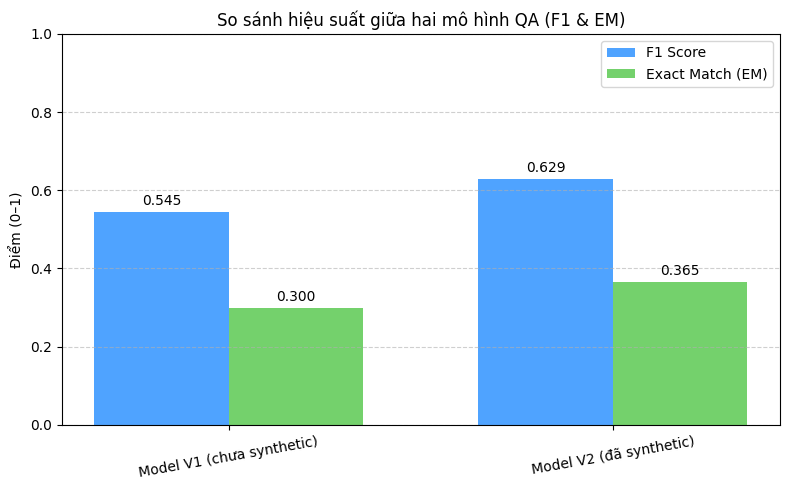

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy giá trị từ kết quả evaluate_model
# (giả sử bạn đã chạy đoạn evaluate trước đó)
print("F1/EM Model V1:", f1_v1, em_v1)
print("F1/EM Model V2:", f1_v2, em_v2)

# Tạo dữ liệu biểu đồ
models = ["Model V1 (chưa synthetic)", "Model V2 (đã synthetic)"]
f1_scores = [f1_v1, f1_v2]
em_scores = [em_v1, em_v2]

x = np.arange(len(models))
width = 0.35

# Tạo biểu đồ cột
plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, f1_scores, width, label='F1 Score', color='#4FA3FF')
bars2 = plt.bar(x + width/2, em_scores, width, label='Exact Match (EM)', color='#74D16C')

# Hiển thị giá trị trên đầu cột
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom', fontsize=10)

# Thiết lập trục và tiêu đề
plt.xticks(x, models, rotation=10)
plt.ylim(0, 1.0)
plt.ylabel("Điểm (0–1)")
plt.title("So sánh hiệu suất giữa hai mô hình QA (F1 & EM)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


DUNG LLM Để đánh giá

In [32]:
!pip install transformers accelerate datasets --upgrade


In [23]:
# ============================================================
# SINH 500 final MẪU QA CHO BASE & SYNTHETIC MODEL
# ============================================================
import json
from tqdm import tqdm
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# === Load 2 model ===
model_base_path = "/kaggle/input/qwen-geo-qa"
model_v2_path   = "/kaggle/input/qwen-geo-qa-v2final"

tok_base = AutoTokenizer.from_pretrained(model_base_path)
tok_v2   = AutoTokenizer.from_pretrained(model_v2_path)

model_base = AutoModelForCausalLM.from_pretrained(
    model_base_path,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

model_v2 = AutoModelForCausalLM.from_pretrained(
    model_v2_path,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# ============================================================
# HÀM LÀM SẠCH & SINH CÂU TRẢ LỜI 
# ============================================================
def clean_answer(text):
    if "<think>" in text and "</think>" in text:
        text = text.split("</think>")[-1]
    text = text.replace("<think>", "")
    text = text.replace("</think>", "")
    text = text.replace("<|im_end|>", "")
    return text.strip()

def build_prompt(context, question):
    return (
        "Trả lời ngắn gọn và chính xác dựa trên đoạn văn sau.\n"
        "Không giải thích, không lặp lại câu hỏi.\n\n"
        f"Đoạn văn:\n{context}\n\n"
        f"Câu hỏi: {question}\n\n"
        "Trả lời:"
    )

def model_answer(model, tokenizer, context, question):
    messages = [{"role": "user", "content": build_prompt(context, question)}]
    prompt_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
    inputs = tokenizer(prompt_text, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=64,
            do_sample=False,
            temperature=0.3,
            top_p=0.9
        )
    raw = tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:], skip_special_tokens=True)
    return clean_answer(raw)

# ============================================================
# SINH 500 MẪU TỪ DỮ LIỆU test_geo
# ============================================================
NUM_SAMPLES = 500
subset = test_geo.select(range(NUM_SAMPLES))

samples_base = []
samples_syn  = []

print(f"🔹 Đang sinh {NUM_SAMPLES} mẫu dữ liệu QA...")

for s in tqdm(subset):
    ctx = s["context"]
    ques = s["question"]
    ref = s["answers"]["text"][0]

    pred_base = model_answer(model_base, tok_base, ctx, ques)
    pred_syn  = model_answer(model_v2, tok_v2, ctx, ques)

    samples_base.append({
        "context": ctx,
        "question": ques,
        "ref": ref,
        "pred": pred_base
    })

    samples_syn.append({
        "context": ctx,
        "question": ques,
        "ref": ref,
        "pred": pred_syn
    })

# ============================================================
# XUẤT RA JSONL
# ============================================================
out_base = "/kaggle/working/eval_base_500.jsonl"
out_syn  = "/kaggle/working/eval_syn_500.jsonl"

with open(out_base, "w", encoding="utf-8") as f:
    for ex in samples_base:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")

with open(out_syn, "w", encoding="utf-8") as f:
    for ex in samples_syn:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")

print("\n✅ Hoàn tất sinh 500 mẫu QA.")
print("📁 Baseline  →", out_base)
print("📁 Synthetic →", out_syn)
print("============================================\n")

🔹 Đang sinh 500 mẫu dữ liệu QA...


100%|██████████| 500/500 [20:23<00:00,  2.45s/it]


✅ Hoàn tất sinh 500 mẫu QA.
📁 Baseline  → /kaggle/working/eval_base_500.jsonl
📁 Synthetic → /kaggle/working/eval_syn_500.jsonl



In [24]:
import json

# ============================================================
# 📂 ĐƯỜNG DẪN 2 FILE JSONL
# ============================================================
file_base = "/kaggle/working/eval_base_500.jsonl"
file_syn  = "/kaggle/working/eval_syn_500.jsonl"

# ============================================================
# 📥 ĐỌC DỮ LIỆU TỪ FILE JSONL
# ============================================================
with open(file_base, "r", encoding="utf-8") as f:
    samples_base = [json.loads(line) for line in f]

with open(file_syn, "r", encoding="utf-8") as f:
    samples_syn = [json.loads(line) for line in f]

# ============================================================
# 🖨️ IN RA MẪU THEO FORMAT GỌN & ĐẸP
# ============================================================
num_show = min(10, len(samples_base))  # in tối đa 10 mẫu

print("\n===== 🔹 SO SÁNH KẾT QUẢ BASE vs SYN 🔹 =====\n")

for i in range(num_show):
    base = samples_base[i]
    syn  = samples_syn[i]

    print(f"===== BASE SAMPLE {i+1} =====")
    print(f"Q: {base['question']}")
    print(f"Ref: {base['ref']}")
    print(f"Pred (Base): {base['pred']}\n")

    print(f"===== SYN SAMPLE {i+1} =====")
    print(f"Q: {syn['question']}")
    print(f"Ref: {syn['ref']}")
    print(f"Pred (Synthetic): {syn['pred']}\n")

print("✅ Đã in xong kết quả 2 file (Base & Synthetic).")



===== 🔹 SO SÁNH KẾT QUẢ BASE vs SYN 🔹 =====

===== BASE SAMPLE 1 =====
Q: Rapsodie espagnole do ai sáng tác?
Ref: Ravel
Pred (Base): Rapsodie espagnole

===== SYN SAMPLE 1 =====
Q: Rapsodie espagnole do ai sáng tác?
Ref: Ravel
Pred (Synthetic): Rapsodie espagnole

===== BASE SAMPLE 2 =====
Q: Những nước nào viện trợ phát triển nhiều hơn Pháp năm 2013?
Ref: Mỹ, Anh và Đức
Pred (Base): Mỹ, Anh và Đức

===== SYN SAMPLE 2 =====
Q: Những nước nào viện trợ phát triển nhiều hơn Pháp năm 2013?
Ref: Mỹ, Anh và Đức
Pred (Synthetic): Mỹ, Anh và Đức

===== BASE SAMPLE 3 =====
Q: Ai là Tổng bí thư của Đảng Cộng sản Trung Quốc từ tháng 11 năm 2012?
Ref: Tập Cận Bình
Pred (Base): Tập Cận Bình

===== SYN SAMPLE 3 =====
Q: Ai là Tổng bí thư của Đảng Cộng sản Trung Quốc từ tháng 11 năm 2012?
Ref: Tập Cận Bình
Pred (Synthetic): Tập Cận Bình

===== BASE SAMPLE 4 =====
Q: Tại đâu mà núi lửa phun lên làm biến chất đá vôi?
Ref: giao điểm của các đứt gãy hoặc các đới đứt gãy lớn
Pred (Base): các đứt gãy hoặc

Đánh giá mô hình LLM

In [2]:
# ============================================================
# 📊 LLM-BASED EVALUATION (Qwen2-7B-Instruct)
# ============================================================
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch, json, re

# ============================================================
# 1️⃣ LOAD MODEL CHẤM ĐIỂM
# ============================================================
judge_model_id = "Qwen/Qwen2-7B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(judge_model_id)
model = AutoModelForCausalLM.from_pretrained(
    judge_model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!
2025-12-09 12:00:43.509066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765281643.693796     153 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765281643.745647     153 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

In [76]:
def extract_json(text):
    text = text.replace("```json", "").replace("```", "").strip()
    matches = re.findall(r"\{.*?\}", text, re.DOTALL)
    if not matches:
        return None
    for m in reversed(matches):  # ưu tiên JSON cuối cùng
        try:
            js = json.loads(m)
            for k in ["factuality", "fluency", "overall"]:
                if k in js:
                    if isinstance(js[k], bool):
                        js[k] = 10.0 if js[k] else 0.0
                    elif isinstance(js[k], str):
                        try:
                            js[k] = float(js[k])
                        except:
                            js[k] = 0.0
            if "overall" not in js and "factuality" in js and "fluency" in js:
                js["overall"] = round((js["factuality"] + js["fluency"]) / 2, 2)
            return js
        except:
            continue
    return None

# ============================================================
# HÀM ĐÁNH GIÁ BẰNG QWEN
# ============================================================
def judge_qwen(context, question, pred, ref=None, max_tokens=128):
    prompt = f"""
Bạn là giám khảo chuyên đánh giá chất lượng câu trả lời trong bài toán Hỏi – Đáp (QA) tiếng Việt.

Yêu cầu:
- So sánh thật kỹ giữa “Đáp án đúng (Reference)” và “Câu trả lời của mô hình (Answer)” dựa trên ngữ nghĩa, không chỉ dựa vào context.
- Nếu hai câu mang cùng nghĩa (dù khác cách diễn đạt, thêm hoặc bớt từ không quan trọng) → factuality = 9–10.
- Nếu câu trả lời sai thông tin chính (sai tên người, địa danh, thời gian, hoặc trái nghĩa) → factuality = 0–3.
- Nếu chỉ đúng một phần hoặc mơ hồ → factuality = 4–6.
- Nếu tương đối đúng nhưng thiếu chi tiết nhỏ → factuality = 7–8.
- Fluency chấm 0–10 dựa trên độ tự nhiên, rõ ràng, đúng ngữ pháp tiếng Việt.

Trả về duy nhất 1 JSON hợp lệ, không thêm lời giải thích:
{{"factuality": number, "fluency": number}}

---
### Context
{context}

### Question
{question}

### Reference (đáp án đúng)
{ref}

### Answer (mô hình sinh ra)
{pred}

### JSON OUTPUT:
""".strip()

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=1024).to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=0.0,
            do_sample=False,
        )

    gen = tokenizer.decode(outputs[0], skip_special_tokens=True)
    tail = gen[len(prompt):].strip()

    data = extract_json(tail)
    if data and "factuality" in data and "fluency" in data:
        data["overall"] = round((data["factuality"] + data["fluency"]) / 2, 2)
    else:
        data = {"factuality": 0, "fluency": 0, "overall": 0}
    return data, tail


# ============================================================
# ĐỌC FILE BASELINE & SYNTHETIC
# ============================================================
base_path = "/kaggle/input/base-data-llm/eval_base_500.jsonl"
syn_path  = "/kaggle/input/syn-data-llm/eval_syn_500.jsonl"

with open(base_path, "r", encoding="utf-8") as f:
    base_data = [json.loads(line) for line in f][:20]  # chỉ lấy 20 mẫu đầu

with open(syn_path, "r", encoding="utf-8") as f:
    syn_data = [json.loads(line) for line in f][:20]

# ============================================================
# CHẤM 20 MẪU & IN KẾT QUẢ
# ============================================================
results = []
for i, (b, s) in enumerate(zip(base_data, syn_data), 1):
    print(f"\n===== SAMPLE {i} =====")
    print(f"Q: {b['question']}")
    print(f"Gold: {b['ref']}")
    print(f"Base: {b['pred']}")
    print(f"Syn:  {s['pred']}")

    score_b, raw_b = judge_qwen(b["context"], b["question"], b["pred"], b["ref"])
    score_s, raw_s = judge_qwen(s["context"], s["question"], s["pred"], s["ref"])

    print("\n--- Model V1 (Baseline) ---")
    print("Score:", score_b)
    print("Raw Output:", raw_b[:400], "..." if len(raw_b) > 400 else "")

    print("\n--- Model V2 (Synthetic) ---")
    print("Score:", score_s)
    print("Raw Output:", raw_s[:400], "..." if len(raw_s) > 400 else "")

    results.append({
        "question": b["question"],
        "ref": b["ref"],
        "base_pred": b["pred"],
        "syn_pred": s["pred"],
        "base_fact": score_b["factuality"],
        "base_flu": score_b["fluency"],
        "base_over": score_b["overall"],
        "syn_fact": score_s["factuality"],
        "syn_flu": score_s["fluency"],
        "syn_over": score_s["overall"],
    })



===== SAMPLE 1 =====
Q: Rapsodie espagnole do ai sáng tác?
Gold: Ravel
Base: Rapsodie espagnole
Syn:  Rapsodie espagnole

--- Model V1 (Baseline) ---
Score: {'factuality': 0, 'fluency': 10, 'overall': 5.0}
Raw Output: {"factuality": 0, "fluency": 10} 

--- Model V2 (Synthetic) ---
Score: {'factuality': 0, 'fluency': 10, 'overall': 5.0}
Raw Output: {"factuality": 0, "fluency": 10} 

===== SAMPLE 2 =====
Q: Những nước nào viện trợ phát triển nhiều hơn Pháp năm 2013?
Gold: Mỹ, Anh và Đức
Base: Mỹ, Anh và Đức
Syn:  Mỹ, Anh và Đức

--- Model V1 (Baseline) ---
Score: {'factuality': 10, 'fluency': 10, 'overall': 10.0}
Raw Output: {"factuality": 10, "fluency": 10} 

--- Model V2 (Synthetic) ---
Score: {'factuality': 10, 'fluency': 10, 'overall': 10.0}
Raw Output: {"factuality": 10, "fluency": 10} 

===== SAMPLE 3 =====
Q: Ai là Tổng bí thư của Đảng Cộng sản Trung Quốc từ tháng 11 năm 2012?
Gold: Tập Cận Bình
Base: Tập Cận Bình
Syn:  Tập Cận Bình

--- Model V1 (Baseline) ---
Score: {'factualit

In [5]:
def extract_json(text):
    text = text.replace("```json", "").replace("```", "").strip()
    matches = re.findall(r"\{.*?\}", text, re.DOTALL)
    if not matches:
        return None
    for m in reversed(matches):  # ưu tiên JSON cuối cùng
        try:
            js = json.loads(m)
            for k in ["factuality", "fluency", "overall"]:
                if k in js:
                    if isinstance(js[k], bool):
                        js[k] = 10.0 if js[k] else 0.0
                    elif isinstance(js[k], str):
                        try:
                            js[k] = float(js[k])
                        except:
                            js[k] = 0.0
            # ✅ Luôn tính lại overall, ghi đè bất kể LLM có sinh ra hay không
            if "factuality" in js and "fluency" in js:
                js["overall"] = round((js["factuality"] + js["fluency"]) / 2, 2)
            return js
        except:
            continue
    return None


In [8]:
from tqdm import tqdm


In [10]:
# ============================================================
# HÀM ĐÁNH GIÁ BẰNG QWEN
# ============================================================
def judge_qwen(context, question, pred, ref=None, max_tokens=128):
    prompt = f"""
Bạn là giám khảo chuyên đánh giá chất lượng câu trả lời trong bài toán Hỏi – Đáp (QA) tiếng Việt.

Yêu cầu:
- So sánh thật kỹ giữa “Đáp án đúng (Reference)” và “Câu trả lời của mô hình (Answer)” dựa trên ngữ nghĩa, không chỉ dựa vào context.
- Nếu hai câu mang cùng nghĩa (dù khác cách diễn đạt, thêm hoặc bớt từ không quan trọng) → factuality = 9–10.
- Nếu câu trả lời sai thông tin chính (sai tên người, địa danh, thời gian, hoặc trái nghĩa) → factuality = 0–3.
- Nếu chỉ đúng một phần hoặc mơ hồ → factuality = 4–6.
- Nếu tương đối đúng nhưng thiếu chi tiết nhỏ → factuality = 7–8.
- Fluency chấm 0–10 dựa trên độ tự nhiên, rõ ràng, đúng ngữ pháp tiếng Việt.

Trả về duy nhất 1 JSON hợp lệ, không thêm lời giải thích:
{{"factuality": number, "fluency": number}}

---
### Context
{context}

### Question
{question}

### Reference (đáp án đúng)
{ref}

### Answer (mô hình sinh ra)
{pred}

### JSON OUTPUT:
""".strip()

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=1024).to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=0.0,
            do_sample=False,
        )

    gen = tokenizer.decode(outputs[0], skip_special_tokens=True)
    tail = gen[len(prompt):].strip()

    data = extract_json(tail)
    if data and "factuality" in data and "fluency" in data:
        data["overall"] = round((data["factuality"] + data["fluency"]) / 2, 2)
    else:
        data = {"factuality": 0, "fluency": 0, "overall": 0}
    return data, tail

In [12]:
# ============================================================
# ĐỌC 500 MẪU TỪ 2 FILE
# ============================================================
base_path = "/kaggle/input/base-data-llm/eval_base_500.jsonl"
syn_path  = "/kaggle/input/syn-data-llm/eval_syn_500.jsonl"

with open(base_path, "r", encoding="utf-8") as f:
    base_data = [json.loads(line) for line in f]

with open(syn_path, "r", encoding="utf-8") as f:
    syn_data = [json.loads(line) for line in f]

print(f"✅ Loaded {len(base_data)} base samples, {len(syn_data)} synthetic samples.\n")


# ============================================================
# CHẤM TOÀN BỘ 500 MẪU
# ============================================================
results = []
for i, (b, s) in enumerate(tqdm(zip(base_data, syn_data), total=len(base_data), desc="Scoring QWEN QA"), 1):
    score_b, _ = judge_qwen(b["context"], b["question"], b["pred"], b["ref"])
    score_s, _ = judge_qwen(s["context"], s["question"], s["pred"], s["ref"])

    results.append({
        "base_fact": score_b["factuality"],
        "base_flu": score_b["fluency"],
        "base_over": score_b["overall"],
        "syn_fact": score_s["factuality"],
        "syn_flu": score_s["fluency"],
        "syn_over": score_s["overall"],
    })


# ============================================================
# TÍNH TRUNG BÌNH & IN KẾT QUẢ CUỐI
# ============================================================
def avg_all(key):
    vals = [r[key] for r in results]  # không loại bỏ 0 điểm
    return round(sum(vals) / len(vals), 2) if vals else 0.0


print("\n===== QWEN QA EVALUATION (500 samples) =====")
print(f"Baseline  - factuality: {avg_all('base_fact')}, fluency: {avg_all('base_flu')}, overall: {avg_all('base_over')}")
print(f"Synthetic - factuality: {avg_all('syn_fact')},  fluency: {avg_all('syn_flu')},  overall: {avg_all('syn_over')}")

✅ Loaded 500 base samples, 500 synthetic samples.



Scoring QWEN QA: 100%|██████████| 500/500 [28:21<00:00,  3.40s/it]


===== QWEN QA EVALUATION (500 samples) =====
Baseline  - factuality: 6.81, fluency: 9.2, overall: 8.0
Synthetic - factuality: 7.49,  fluency: 9.38,  overall: 8.43


In [16]:
# ============================================================
# LƯU KẾT QUẢ TRUNG BÌNH TỔNG HỢP
# ============================================================
summary = {
    "Baseline": {
        "factuality": avg_all("base_fact"),
        "fluency": avg_all("base_flu"),
        "overall": avg_all("base_over"),
    },
    "Synthetic": {
        "factuality": avg_all("syn_fact"),
        "fluency": avg_all("syn_flu"),
        "overall": avg_all("syn_over"),
    }
}

summary_path = "/kaggle/working/qwen_eval_summary.json"

with open(summary_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, ensure_ascii=False, indent=2)

print(f"\n💾 Saved summary results to: {summary_path}")
print(json.dumps(summary, indent=2, ensure_ascii=False))


💾 Saved summary results to: /kaggle/working/qwen_eval_summary.json
{
  "Baseline": {
    "factuality": 6.81,
    "fluency": 9.2,
    "overall": 8.0
  },
  "Synthetic": {
    "factuality": 7.49,
    "fluency": 9.38,
    "overall": 8.43
  }
}


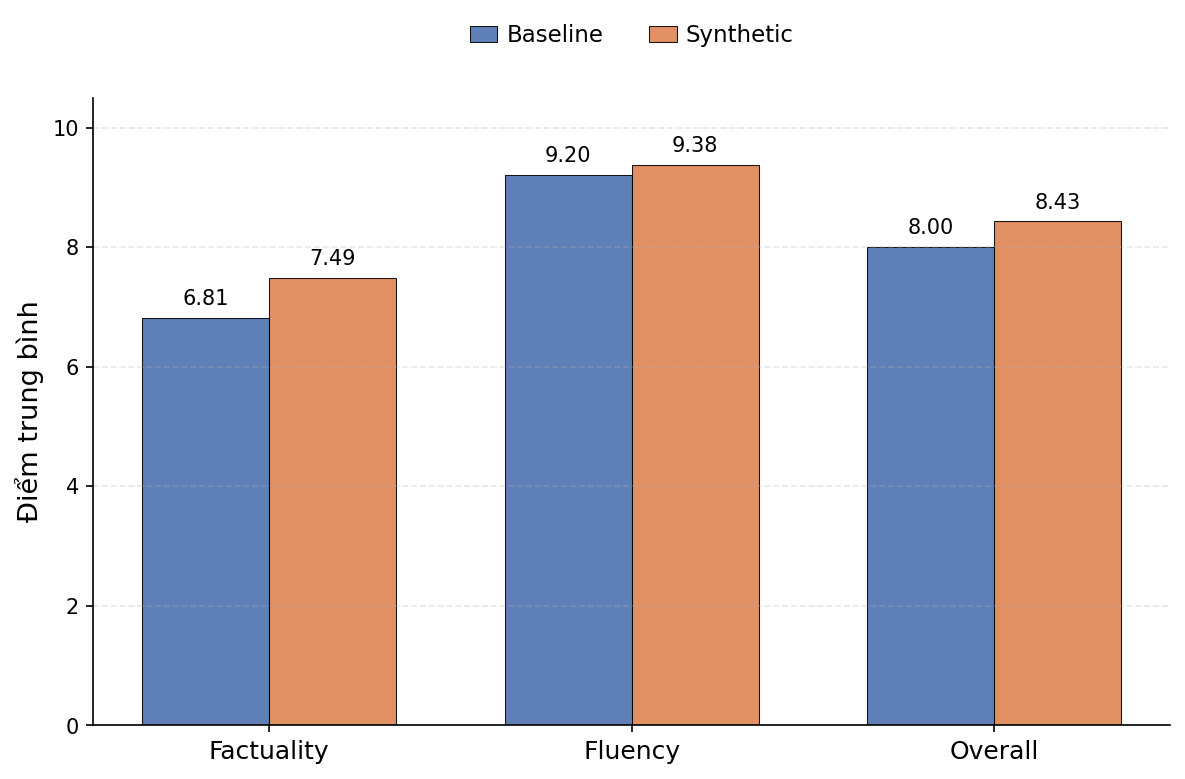

In [20]:
import matplotlib.pyplot as plt
import json
import numpy as np

# ============================================================
# 1️⃣ ĐỌC FILE TÓM TẮT
# ============================================================
summary_path = "/kaggle/working/qwen_eval_summary.json"

with open(summary_path, "r", encoding="utf-8") as f:
    summary = json.load(f)

baseline = summary["Baseline"]
synthetic = summary["Synthetic"]

# ============================================================
# 2️⃣ DỮ LIỆU
# ============================================================
metrics = ["Factuality", "Fluency", "Overall"]
base_scores = [baseline["factuality"], baseline["fluency"], baseline["overall"]]
syn_scores = [synthetic["factuality"], synthetic["fluency"], synthetic["overall"]]

x = np.arange(len(metrics))
width = 0.35

# ============================================================
# 3️⃣ VẼ BIỂU ĐỒ CỘT
# ============================================================
plt.figure(figsize=(8, 5.8), dpi=150)
bars1 = plt.bar(x - width/2, base_scores, width, label="Baseline", color="#4C72B0", alpha=0.9, edgecolor="black", linewidth=0.5)
bars2 = plt.bar(x + width/2, syn_scores, width, label="Synthetic", color="#DD8452", alpha=0.9, edgecolor="black", linewidth=0.5)

plt.xticks(x, metrics, fontsize=12)
plt.ylim(0, 10.5)
plt.ylabel("Điểm trung bình", fontsize=13)

# ============================================================
# 4️⃣ HIỂN THỊ GIÁ TRỊ TRÊN CỘT
# ============================================================
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.15, f"{height:.2f}",
                 ha='center', va='bottom', fontsize=10, fontweight="medium")

add_labels(bars1)
add_labels(bars2)

# ============================================================
# 5️⃣ LEGEND & STYLE
# ============================================================
plt.legend(fontsize=11, loc="upper center", bbox_to_anchor=(0.5, 1.15),
           ncol=2, frameon=False, handlelength=1.2, handletextpad=0.4)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.92])  # chừa khoảng trống cho legend

# ============================================================
# 6️⃣ LƯU ẢNH
# ============================================================
plt.savefig("/kaggle/working/qwen_eval_comparison_pretty.png", dpi=300, bbox_inches="tight")
plt.show()
